# **MAGENTA:** The Global **MA**ngrove **GEN**e Ca**TA**logue


---
**MAGENTA**, un catálogo integrado y consistentemente procesado de genes del mundo microbiano de los maglares.

---
# SUMMARY

---
Los manglares son una conocida reserva de diversidad biológica y un ecosistema altamente productivo. Diversos estudios metagenómicos en diferentes partes del mundo han reconocido a la comunidad microbiana del manglar como un agente importante dentro de los ciclos biogeoquímicos, en los cuales se llevan a cabo procesos tales como la transformación del carbono, la fotosíntesis, la fijación de nitrógeno y la reducción de azufre. En la actualidad, sin embargo, no contamos con una herramienta informática que nos permita entender estos procesos y relaciones a una **escala global**.

**MAGENTA** (o Global **MA**ngrove **GEN**e Ca**TA**logue) actúa como un catálogo global de genes únicos y no redundantes a nivel de especie (agrupados al 95% de identidad de nucleótidos) que, a partir de los datos de libre acceso disponibles en bases de datos especializadas (WGS, metagenomas de acceso público - ENA) de cinco de los principales hábitats de la comunidad microbiana del manglar (rizosfera, agua de mar, sedimento, suelo, humedal), busca formular nuevas hipótesis sobre la abundancia, distribución y funciones metabólicas de los microorganismos en el ecosistema del manglar, con miras a atender esta necesidad.



---
# METHODS

# Selection of Metagenomes: *Search and Retrieve Mangrove Metagenome Selected Datasets*

## **Setting Up the Magenta Workspace**
Establish the directory structure for the Magenta workspace

In [282]:
! mkdir -p MAGENTA/{data/{raw,clean},results,metadata,scripts}

In [285]:
# Create directory paths 
metadata_path = "/home/jupyter-andres/MAGENTA/metadata/"
rawdata_path = "/home/jupyter-andres/MAGENTA/data/raw/"
data_path = "/home/jupyter-andres/MAGENTA/data/clean/"
scripts_path = "/home/jupyter-andres/MAGENTA/scripts/"


Import the necessary libraries

In [286]:
from io import StringIO
import pandas as pd
import requests
import matplotlib.pyplot as plt
import plotly.express as px

## **Searching Mangrove Metagenome Datasets**
Search for *mangrove metagenome* publicly available datasets from the European Nucleotide Archive (ENA Portal API).

### **Target search for "mangrove metagenome" datasets**
Search for mangrove metagenome WGS datasets *(raw reads)* programmatically through an "advanced search".

**Advanced Search**:
- result : read_run (*raw reads*)
- query :
    - library_strategy = "WGS" (*sequencing technique intended for the library*)
    - sample_description = "mangrove" (*detailed sample description*)
- fields : run_accesion, study_accesion, etc.

    
    
    A brief description of the advanced search "fields" used:

    
<div align="center">
<table>
  <tr>
    <th>Fields</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>run_accesion</td>
    <td><em>run accession number</em></td>
  </tr>
  <tr>
    <td>study_accession</td>
    <td><em>study accession number</em></td>
  </tr>
  <tr>
    <td>sample_description</td>
    <td><em>detailed sample description</em></td>
  </tr>
  <tr>
    <td>library_strategy</td>
    <td><em>sequencing technique intended for the library</em></td>
  </tr>
  <tr>
    <td>scientific_name</td>
    <td><em>scientific name of an organism</em></td>
  </tr>
  <tr>
    <td>instrument_platform</td>
    <td><em>instrument platform</em></td>
  </tr>
   <tr>
   <tr>
    <td>instrument_model</td>
    <td><em>instrument model used in sequencing experiment</em></td>
  </tr>
   <tr>
    <td>location</td>
    <td><em>geographic location of isolation of the sample<em></td>
  </tr>
  <tr>
    <td><em>country<em></td>
    <td><em>locality of sample isolation<em></td>
  </tr>
  </table>

</div>


    
    For more information visit:
    https://ena-docs.readthedocs.io/en/latest/retrieval/programmatic-access/advanced-search.html#retrieve-raw-read-and-primary-metagenome-datasets-for-cow-rumen-samples-collected-in-the-uk
    https://www.ebi.ac.uk/ena/portal/api/swagger-ui/index.html


In [287]:
  # URL for JSON request
url ='https://www.ebi.ac.uk/ena/portal/api/search?result=read_run&query=library_strategy="WGS" AND sample_description="mangrove"&fields=run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,instrument_model,lat,lon,country,fastq_bytes,fastq_ftp&format=json'

  # Send a GET request to the URL
response = requests.get(url)

  # Parse the JSON response into a StringIO object
data = StringIO(response.text)

  # Create the DataFrame from the JSON parsed data
df = pd.read_json(data)
df

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp
0,SRR6820482,SAMN08667649,PRJNA437562,Mangrove soil,Mangrove metavirome,WGS,soil metagenome,ILLUMINA,Illumina HiSeq 4000,2016-08-31,,,,"China:Guanxi, Beibu bay",664293217;860299461,ftp.sra.ebi.ac.uk/vol1/fastq/SRR682/002/SRR682...
1,SRR6820484,SAMN08667647,PRJNA437562,Mangrove soil,Mangrove metavirome,WGS,soil metagenome,ILLUMINA,Illumina HiSeq 4000,2015-08-31,,,,"China:Guanxi, Beibu bay",761183546;990840409,ftp.sra.ebi.ac.uk/vol1/fastq/SRR682/004/SRR682...
2,SRR6820485,SAMN08667652,PRJNA437562,Mangrove soil,Mangrove metavirome,WGS,soil metagenome,ILLUMINA,Illumina HiSeq 4000,2017-03-31,,,,"China:Hainan, Yalong bay",915466402;1212721632,ftp.sra.ebi.ac.uk/vol1/fastq/SRR682/005/SRR682...
3,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...
4,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,SRR24201527,SAMN33848497,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-10-02,20.775 N 86.9253 E,20.775,86.9253,"India: Bhitarkanika mangrove forest, Odisha",2700127663;2824067298,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/027/SRR242...
246,SRR5019746,SAMN06011245,PRJNA353167,This strain of Pseudomonas hussainii named MB3...,Pseudomonas hussainii strain:MB3 Genome sequen...,WGS,Atopomonas hussainii,ILLUMINA,NextSeq 500,2015-09-30,11.5061 N 92.7017 E,11.5061,92.7017,India: Andaman islands,56828614,ftp.sra.ebi.ac.uk/vol1/fastq/SRR501/006/SRR501...
247,ERR12658426,SAMEA115283882,PRJEB72453,Sample four from the sixth transfer of the mic...,Explore and identify the functional potential ...,WGS,mangrove metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-06-30,10.26366 N 75.59169 W,10.26366,-75.59169,Colombia,2944631619;3055381112,ftp.sra.ebi.ac.uk/vol1/fastq/ERR126/026/ERR126...
248,SRR26872073,SAMN38153217,PRJNA1036849,"Lutjanus argentimaculatus, commonly referred t...",Lutjanus argentimaculatus Genome sequencing an...,WGS,Lutjanus argentimaculatus,ILLUMINA,Illumina NovaSeq 6000,2021-02-09,,,,"India: Chennai, Tamilnadu",13006149594;12989827686,ftp.sra.ebi.ac.uk/vol1/fastq/SRR268/073/SRR268...


In [288]:
# Save on a CSV field
df.to_csv(metadata_path + '00_mangrove_metagenome_datasets.csv', index=False)

## **Exploring Retrieved Datasets**
Explore the metadata of the *mangrove metagenome* retrieved datasets.

### **General Information**
Display general information of the *mangrove metagenome* retrieved datasets.

In [344]:
#Columns and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   run_accession        250 non-null    object
 1   sample_accession     250 non-null    object
 2   study_accession      250 non-null    object
 3   sample_description   250 non-null    object
 4   study_title          250 non-null    object
 5   library_strategy     250 non-null    object
 6   scientific_name      250 non-null    object
 7   instrument_platform  250 non-null    object
 8   instrument_model     250 non-null    object
 9   collection_date_end  250 non-null    object
 10  location             250 non-null    object
 11  lat                  250 non-null    object
 12  lon                  250 non-null    object
 13  country              250 non-null    object
 14  fastq_bytes          250 non-null    object
 15  fastq_ftp            250 non-null    object
dtypes: objec

In [291]:
# Number of Unique Runs (wgs raw lectures, .fastq)
len(df)

250

In [292]:
# Number of Unique Projects
len(df['study_accession'].unique())

123

In [293]:
# Number of Unique Samples
len(df['sample_accession'].unique())

238

In [294]:
# Top 10 Counts of Unique Runs per Project
df.groupby('study_accession')['run_accession'].nunique().nlargest(10)

study_accession
PRJNA798446     50
PRJEB70438      26
PRJNA699587     19
PRJEB41295       9
PRJNA947344      8
PRJNA73797       7
PRJNA437562      6
PRJEB22775       3
PRJNA1036849     3
PRJEB72453       2
Name: run_accession, dtype: int64

In [295]:
# Top 10 Counts of Unique Samples per Project
df.groupby('study_accession')['sample_accession'].nunique().nlargest(10)

study_accession
PRJNA798446    50
PRJEB70438     26
PRJNA699587    19
PRJEB41295      9
PRJNA947344     8
PRJNA437562     6
PRJEB22775      2
PRJEB72453      2
PRJNA60545      2
PRJNA612127     2
Name: sample_accession, dtype: int64

In [296]:
# Counts of Unique Samples per Project
df.groupby('study_accession')['sample_accession'].nunique().sort_values(ascending=False)

study_accession
PRJNA798446    50
PRJEB70438     26
PRJNA699587    19
PRJEB41295      9
PRJNA947344     8
               ..
PRJNA697766     1
PRJNA697768     1
PRJNA697767     1
PRJNA73797      1
PRJNA924967     1
Name: sample_accession, Length: 123, dtype: int64

### **Locations Information**
Display location information of the *mangrove metagenome* retrieved datasets.

In [297]:
# Number of Unique Locations (including the "empty" option)
len(df['location'].unique())

58

In [298]:
# Number of Runs with Empty Locations
len(df[df['location'] == ''])

15

In [299]:
# Top 10 Counts of Unique Runs per Location
df.groupby('location')['run_accession'].nunique().nlargest(10)

location
16.2781 N 61.5582 W    80
22.43 N 113.64 E       50
                       15
23.27 N 116.52 E        9
23.55 N 117.25 E        7
27.8977 N 97.0387 W     7
12.677 S 38.733 W       6
12.681 S 38.731 W       6
27.8962 N 97.0386 W     6
27.8985 N 97.0386 W     5
Name: run_accession, dtype: int64

### **Mangrove Habitats (or Scientific Names) Information**
Display mangrove habitats information of the *mangrove metagenome* retrieved datasets.

In [300]:
# Unique mangrove retrieved habitats
df['scientific_name'].unique()

array(['soil metagenome', 'mangrove metagenome', 'uncultured bacterium',
       'sediment metagenome', 'aquatic metagenome',
       'Streptomyces xiamenensis', 'marine metagenome',
       'wetland metagenome', 'Bacillus thuringiensis JM-Mgvxx-63',
       'metagenome', 'Rubinisphaera brasiliensis', 'Chlorella vulgaris',
       'Messastrum gracile', 'Pararhodobacter sp. CCB-MM2',
       'Atopomonas hussainii', 'Lutjanus argentimaculatus',
       'Rhodopirellula sp. MGV'], dtype=object)

In [301]:
# Counts of Unique Runs per Mangrove Habitats
df.groupby('scientific_name')['run_accession'].nunique().sort_values(ascending=False)

scientific_name
mangrove metagenome                   115
sediment metagenome                    50
uncultured bacterium                   26
wetland metagenome                     18
soil metagenome                        16
Streptomyces xiamenensis                7
metagenome                              4
Lutjanus argentimaculatus               3
Atopomonas hussainii                    2
aquatic metagenome                      2
Rhodopirellula sp. MGV                  1
Rubinisphaera brasiliensis              1
Messastrum gracile                      1
Bacillus thuringiensis JM-Mgvxx-63      1
Chlorella vulgaris                      1
Pararhodobacter sp. CCB-MM2             1
marine metagenome                       1
Name: run_accession, dtype: int64

In [302]:
# Counts of Unique Samples per Mangrove Habitats
df.groupby('scientific_name')['sample_accession'].nunique().sort_values(ascending=False)

scientific_name
mangrove metagenome                   114
sediment metagenome                    50
uncultured bacterium                   26
wetland metagenome                     18
soil metagenome                        16
metagenome                              3
Atopomonas hussainii                    1
Bacillus thuringiensis JM-Mgvxx-63      1
Chlorella vulgaris                      1
Streptomyces xiamenensis                1
Rubinisphaera brasiliensis              1
Rhodopirellula sp. MGV                  1
Pararhodobacter sp. CCB-MM2             1
Messastrum gracile                      1
Lutjanus argentimaculatus               1
marine metagenome                       1
aquatic metagenome                      1
Name: sample_accession, dtype: int64

In [303]:
# Exploring the 'Bacillus thuringiensis JM-Mgvxx-63' mangrove habitat or "scientific name" (ScientificNameOption10) information
df_SN_op10 = df[df['scientific_name'] == 'Bacillus thuringiensis JM-Mgvxx-63']
df_SN_op10

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp
69,SRR1043577,SAMN02402225,PRJNA227447,"""Draft Genome Sequence of the chitinolyticus B...",Bacillus thuringiensis JM-Mgvxx-63 Genome sequ...,WGS,Bacillus thuringiensis JM-Mgvxx-63,ION_TORRENT,Ion Torrent PGM,,,,,,445029780,ftp.sra.ebi.ac.uk/vol1/fastq/SRR104/007/SRR104...


In [304]:
# Downloading the 'Bacillus thuringiensis JM-Mgvxx-63' scientific name (ScientificNameOption10) information
df_SN_op10.to_csv(metadata_path + 'Bacillus_thuringiensis_JM-Mgvxx-63.csv', index=False)

In [313]:
# Exploring the 'mangrove metagenome' scientific name (ScientificNameOption1) information
df_SN_op1 = df[df['scientific_name'] == 'mangrove metagenome']
len(df_SN_op1)

115

In [345]:
# Exploring the 'mangrove metagenome' scientific name (ScientificNameOption1) Sample Descriptions information
df_SN_op1.groupby(df_SN_op1['sample_description'])['sample_accession'].nunique().sort_values(ascending=False)

sample_description
Enriched cells from mangrove seawater in Basse-Terre, Guadeloupe                                                                                                                                80
Mangrove rhizosphere metagenome                                                                                                                                                                  9
Metagenome or environmental sample from mangrove soil recolonization after shrimp farm metagenome                                                                                                6
Metagenome from mangrove soil harvested by shrimp farm                                                                                                                                           5
Metagenome or environmental sample from mangrove metagenome impacted by shrimp farm                                                                                                              4
Metage

In [315]:
# Exploring the 'mangrove metagenome' scientific name (ScientificNameOption1) 'rhizosphere' Sample Descriptions information
len(df_SN_op1[df_SN_op1['sample_description'].str.contains("rhizosphere")])

9

In [340]:
# Exploring the 'aquatic metagenome' scientific name (ScientificNameOption7) information
df_SN_op7 = df[df['scientific_name'] == 'aquatic metagenome']
df_SN_op7

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp
24,SRR4297032,SAMN05806435,PRJNA344556,Enrichment from Brazil mangrove soil,Enrichment from mangrove soil Raw sequence reads,WGS,aquatic metagenome,ILLUMINA,Illumina HiSeq 2500,2011-10-11,13.367918 S 39.056139 W,-13.367918,-39.056139,Brazil:Bahia,15765625751;16293179183,ftp.sra.ebi.ac.uk/vol1/fastq/SRR429/002/SRR429...
112,SRR4297033,SAMN05806435,PRJNA344556,Enrichment from Brazil mangrove soil,Enrichment from mangrove soil Raw sequence reads,WGS,aquatic metagenome,ILLUMINA,Illumina HiSeq 2500,2011-10-11,13.367918 S 39.056139 W,-13.367918,-39.056139,Brazil:Bahia,42541189333;38779694509,ftp.sra.ebi.ac.uk/vol1/fastq/SRR429/003/SRR429...


In [339]:
# Exploring the 'aquatic metagenome' scientific name (ScientificNameOption7) Sample Descriptions information
df_SN_op7.groupby(df_SN_op7['sample_description'])['sample_accession'].nunique().sort_values(ascending=False)

sample_description
Enrichment from Brazil mangrove soil    1
Name: sample_accession, dtype: int64

## **Selecting Useful Datasets**
After exploring the metadata of the retrieved *mangrove metagenome* datasets, handle incomplete, inconsistent or unuseful datasets for our future workflow analysis.

### **Handling incomplete datasets**

In [319]:
# Delete the Runs with "empty" Location cells
df_2 = df[df['location'] != '']
df_2

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp
3,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...
4,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...
5,ERR12329181,SAMEA114664778,PRJEB70438,Site 13A1 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.466203 N 81.732981 W,7.466203,-81.732981,Panama,857821694;843231396,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/081/ERR123...
6,ERR12329183,SAMEA114664780,PRJEB70438,Site 13A3 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.465868 N 81.726241 W,7.465868,-81.726241,Panama,555010025;541085504,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/083/ERR123...
7,ERR12329184,SAMEA114664781,PRJEB70438,Site 13A4 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.462678 N 81.722228 W,7.462678,-81.722228,Panama,590035569;603841669,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/084/ERR123...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,20.7744 N 86.9268 E,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...
245,SRR24201527,SAMN33848497,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-10-02,20.775 N 86.9253 E,20.775,86.9253,"India: Bhitarkanika mangrove forest, Odisha",2700127663;2824067298,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/027/SRR242...
246,SRR5019746,SAMN06011245,PRJNA353167,This strain of Pseudomonas hussainii named MB3...,Pseudomonas hussainii strain:MB3 Genome sequen...,WGS,Atopomonas hussainii,ILLUMINA,NextSeq 500,2015-09-30,11.5061 N 92.7017 E,11.5061,92.7017,India: Andaman islands,56828614,ftp.sra.ebi.ac.uk/vol1/fastq/SRR501/006/SRR501...
247,ERR12658426,SAMEA115283882,PRJEB72453,Sample four from the sixth transfer of the mic...,Explore and identify the functional potential ...,WGS,mangrove metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-06-30,10.26366 N 75.59169 W,10.26366,-75.59169,Colombia,2944631619;3055381112,ftp.sra.ebi.ac.uk/vol1/fastq/ERR126/026/ERR126...


In [320]:
# Save on a CSV field
df_2.to_csv(metadata_path + '01_mangrove_metagenome_datasets_notemptylocations.csv', index=False)

### **Handling inconsistent datasets**

In [321]:
# Label 'General Scientific Names' as either being:
# wetland metagenome, seawater metagenome, rhizosphere metagenome, soil metagenome, or sediment metagenome 'Specific Scientific Names'
# through the Sample Description Column

other_SN_label = ["mangrove metagenome", "metagenome", "aquatic metagenome", "marine metagenome"]

  # Create a label function to apply to the 'scientific_name' column
def label_mangrove_metagenome(row):
  if row['scientific_name'] in [other_SN_label[0] , other_SN_label[1], other_SN_label[2], other_SN_label[3]]:
    if "soil" in row['sample_description'].lower():
      return "soil metagenome"
    elif "rhizosphere" in row['sample_description'].lower():
      return "rhizosphere metagenome"
    elif "seawater" in row['sample_description'].lower():
      return "seawater metagenome"
    elif "sediment" in row['sample_description'].lower():
      return "sediment metagenome"
    elif "wetland" in row['sample_description'].lower():
      return "wetland metagenome"
    else:
      return " "
  else:
    return row['scientific_name']  # Keep the original value

  # Apply the function to create a new 'scientific_name_labels' column
df_3 = df_2.copy()
df_3['scientific_name_labels'] = df_3.apply(label_mangrove_metagenome, axis=1)

df_3

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp,scientific_name_labels
3,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...,rhizosphere metagenome
4,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...,rhizosphere metagenome
5,ERR12329181,SAMEA114664778,PRJEB70438,Site 13A1 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.466203 N 81.732981 W,7.466203,-81.732981,Panama,857821694;843231396,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/081/ERR123...,uncultured bacterium
6,ERR12329183,SAMEA114664780,PRJEB70438,Site 13A3 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.465868 N 81.726241 W,7.465868,-81.726241,Panama,555010025;541085504,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/083/ERR123...,uncultured bacterium
7,ERR12329184,SAMEA114664781,PRJEB70438,Site 13A4 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.462678 N 81.722228 W,7.462678,-81.722228,Panama,590035569;603841669,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/084/ERR123...,uncultured bacterium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,20.7744 N 86.9268 E,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...,soil metagenome
245,SRR24201527,SAMN33848497,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-10-02,20.775 N 86.9253 E,20.775,86.9253,"India: Bhitarkanika mangrove forest, Odisha",2700127663;2824067298,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/027/SRR242...,soil metagenome
246,SRR5019746,SAMN06011245,PRJNA353167,This strain of Pseudomonas hussainii named MB3...,Pseudomonas hussainii strain:MB3 Genome sequen...,WGS,Atopomonas hussainii,ILLUMINA,NextSeq 500,2015-09-30,11.5061 N 92.7017 E,11.5061,92.7017,India: Andaman islands,56828614,ftp.sra.ebi.ac.uk/vol1/fastq/SRR501/006/SRR501...,Atopomonas hussainii
247,ERR12658426,SAMEA115283882,PRJEB72453,Sample four from the sixth transfer of the mic...,Explore and identify the functional potential ...,WGS,mangrove metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-06-30,10.26366 N 75.59169 W,10.26366,-75.59169,Colombia,2944631619;3055381112,ftp.sra.ebi.ac.uk/vol1/fastq/ERR126/026/ERR126...,soil metagenome


In [322]:
# Extract the year from the 'collection_date_end' column ('YYYY-MM-DD')

df_3['collection_date_year'] = df_3['collection_date_end'].str[:4]
df_3

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp,scientific_name_labels,collection_date_year
3,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...,rhizosphere metagenome,2018
4,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...,rhizosphere metagenome,2018
5,ERR12329181,SAMEA114664778,PRJEB70438,Site 13A1 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.466203 N 81.732981 W,7.466203,-81.732981,Panama,857821694;843231396,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/081/ERR123...,uncultured bacterium,2017
6,ERR12329183,SAMEA114664780,PRJEB70438,Site 13A3 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.465868 N 81.726241 W,7.465868,-81.726241,Panama,555010025;541085504,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/083/ERR123...,uncultured bacterium,2017
7,ERR12329184,SAMEA114664781,PRJEB70438,Site 13A4 Mangrove sample,Assembly-based metagenomics of coral reef & ma...,WGS,uncultured bacterium,ILLUMINA,NextSeq 550,2017-10-13,7.462678 N 81.722228 W,7.462678,-81.722228,Panama,590035569;603841669,ftp.sra.ebi.ac.uk/vol1/fastq/ERR123/084/ERR123...,uncultured bacterium,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,20.7744 N 86.9268 E,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...,soil metagenome,2022
245,SRR24201527,SAMN33848497,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-10-02,20.775 N 86.9253 E,20.775,86.9253,"India: Bhitarkanika mangrove forest, Odisha",2700127663;2824067298,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/027/SRR242...,soil metagenome,2021
246,SRR5019746,SAMN06011245,PRJNA353167,This strain of Pseudomonas hussainii named MB3...,Pseudomonas hussainii strain:MB3 Genome sequen...,WGS,Atopomonas hussainii,ILLUMINA,NextSeq 500,2015-09-30,11.5061 N 92.7017 E,11.5061,92.7017,India: Andaman islands,56828614,ftp.sra.ebi.ac.uk/vol1/fastq/SRR501/006/SRR501...,Atopomonas hussainii,2015
247,ERR12658426,SAMEA115283882,PRJEB72453,Sample four from the sixth transfer of the mic...,Explore and identify the functional potential ...,WGS,mangrove metagenome,ILLUMINA,Illumina NovaSeq 6000,2021-06-30,10.26366 N 75.59169 W,10.26366,-75.59169,Colombia,2944631619;3055381112,ftp.sra.ebi.ac.uk/vol1/fastq/ERR126/026/ERR126...,soil metagenome,2021


In [323]:
# Save on a CSV field
df_3.to_csv(metadata_path + '02_mangrove_metagenome_datasets_scientificnamelabels_and_collectiondateyear_newcolums.csv', index=False)

### **Handling unuseful datasets**

In [324]:
# Remove Runs for which the Scientific Name is not one of the following:
# wetland metagenome, seawater metagenome, rhizosphere metagenome, soil metagenome, or sediment metagenome Specific Scientific Names

df_4 = df_3[(df_3['scientific_name_labels'] == 'wetland metagenome') | (df_3['scientific_name_labels'] == 'sediment metagenome') | (df_3['scientific_name_labels'] == 'rhizosphere metagenome') | (df_3['scientific_name_labels'] == 'soil metagenome') | (df_3['scientific_name_labels'] == 'seawater metagenome')]

len(df_4)

186

In [325]:
# Save on a CSV field
df_4.to_csv(metadata_path + '03_mangrove_metagenome_datasets_onlyspecificscientificnamelabels.csv', index=False)

In [ ]:
# Manually remove the unnecessary datasets

# Conduct a final manual inspection of the descriptions of Selected Dataset "samples" titles to determine whether the datasets are useful or not
df_sampledescription_selecteddatasets = df_4.groupby(['sample_description', 'scientific_name_labels'])['scientific_name_labels'].count().unstack().fillna(0)

In [330]:
# Save to CSV

  # Reset the index to make 'sample_description' a column
df_sampledescription_selecteddatasets = df_sampledescription_selecteddatasets.reset_index()

df_sampledescription_selecteddatasets.to_csv(metadata_path + '00_table_df_sampledescription_selecteddatasets.csv', index=False)

In [333]:
# Determine the manual inspection unuseful datasets
df_unuseful_manual_datasets = df_4[(df_4['sample_description'].str.contains("Enrich.*", case=False)) | (df_4['sample_description'].str.contains("shrimp.*", case=False)) | (df_4['sample_description'].str.contains("microcosm.*", case=False))| (df_4['sample_description']== "Sediment microbial communities from coastal wetland in Texas, United States Mangrove dominant sediment")]
len(df_unuseful_manual_datasets)


115

In [334]:
# Remove the unnecessary datasets #1
df_5 = df_4[~df_4['sample_description'].str.contains("Enrich.*|shrimp.*|microcosm.*", case=False)]
len(df_5)  

87

In [335]:
# Remove the unnecessary datasets #2
df_6 = df_5[df_5['sample_description'] != "Sediment microbial communities from coastal wetland in Texas, United States Mangrove dominant sediment"]
len(df_6)

71

In [336]:
# Save on a CSV field
df_6.to_csv(metadata_path + '04_mangrove_metagenome_datasets_manuallyremoveunusefuldatasets.csv', index=False)

In [337]:
df_sampledescription_selecteddatasets_01 = df_6.groupby(['sample_description', 'scientific_name_labels'])['scientific_name_labels'].count().unstack().fillna(0)
df_sampledescription_selecteddatasets_01

scientific_name_labels,rhizosphere metagenome,sediment metagenome,soil metagenome,wetland metagenome
sample_description,,,,
Mangrove rhizosphere metagenome,9.0,0.0,0.0,0.0
"Mangrove sediments in the Qi’ao Mangrove Wetland Park of Guangdong province, China",0.0,50.0,0.0,0.0
Metagenome from Yunxiao mangrove sediment,0.0,2.0,0.0,0.0
"Sediment microbial communities from coastal wetland in Texas, United States Mangrove dominant sediment, untreated",0.0,0.0,0.0,2.0
Whole metagenome of rhizosphere soil of Dangmal from Bhitarkanika mangrove ecosystem for bacterial community analysis during monsoon season,0.0,0.0,1.0,0.0
Whole metagenome of rhizosphere soil of Dangmal from Bhitarkanika mangrove ecosystem for bacterial community analysis during summer season,0.0,0.0,1.0,0.0
Whole metagenome of rhizosphere soil of Gupti from Bhitarkanika mangrove ecosystem for bacterial community analysis during monsoon season,0.0,0.0,1.0,0.0
Whole metagenome of rhizosphere soil of Gupti from Bhitarkanika mangrove ecosystem for bacterial community analysis during summer season,0.0,0.0,1.0,0.0
Whole metagenome of rhizosphere soil of Habalikhati from Bhitarkanika mangrove ecosystem for bacterial community analysis during monsoon season,0.0,0.0,1.0,0.0


## **Making the Mangrove Metagenome Selected Datasets Scatter Geo Plot**

In [341]:
df_scatter_geo = df_6.copy()

### **Calculate the Scatter Geo Plot Counts**


In [342]:
# Calculate the Runs count for each combination of 'location' and 'scientific_name_labels'

runs_count_df = df_scatter_geo.groupby(['location', 'scientific_name_labels'])['run_accession'].nunique().unstack().fillna(0)

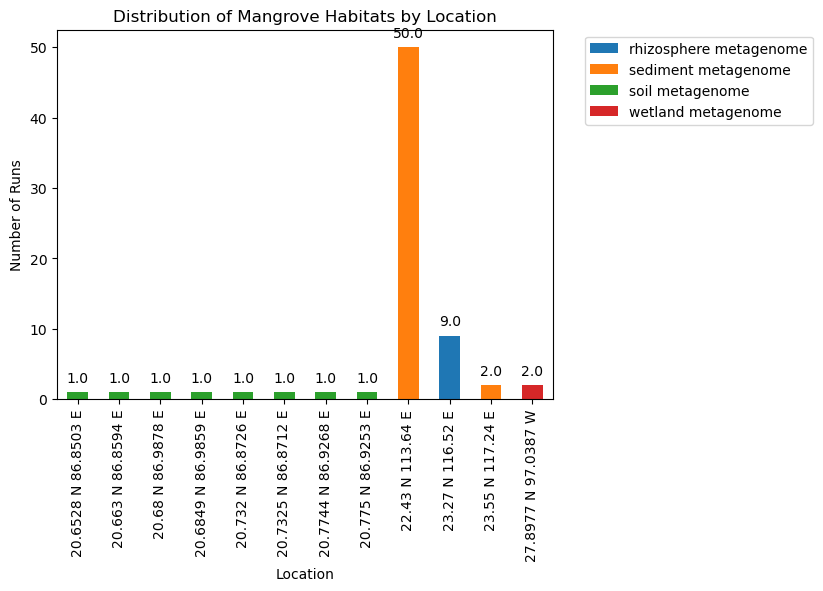

In [346]:
# @title Runs Count:

# Create a bar plot for visualization

_ = runs_count_df.plot(kind='bar', stacked=True)

  # Place the bar values in the bar plot
for p in _.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        _.annotate(f'{height}', (x + width/2, y + 2.0 + height), ha='center', va='center')

  # Place the labels in the bar plot
plt.xlabel('Location')
plt.ylabel('Number of Runs')
plt.title('Distribution of Mangrove Habitats by Location')

  # Place the legend outside the bar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  # Save the bar plot
#plt.savefig('Distribution_of_Mangrove_Habitats_by_Location.jpg', bbox_inches='tight')

  # Display the plot
plt.show()

In [347]:
# Add to df_scatter_geo as 'runs_count' column

runs_count_df = runs_count_df.stack().reset_index(name='runs_count') # Flatten the runs_count_df
df_scatter_geo = df_scatter_geo.merge(runs_count_df, on=['location', 'scientific_name_labels'])

df_scatter_geo

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp,scientific_name_labels,collection_date_year,runs_count
0,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...,rhizosphere metagenome,2018,9.0
1,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...,rhizosphere metagenome,2018,9.0
2,SRR17658262,SAMN25078545,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2306559317;2451278707,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/062/SRR176...,sediment metagenome,2019,50.0
3,SRR17658267,SAMN25078541,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2476667887;2652808811,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/067/SRR176...,sediment metagenome,2019,50.0
4,SRR17658269,SAMN25078539,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2412199078;2593155762,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/069/SRR176...,sediment metagenome,2019,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SRR17658297,SAMN25078513,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,4509019404;4570932808,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/097/SRR176...,sediment metagenome,2019,50.0
67,SRR17658300,SAMN25078502,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2679965801;2839928294,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/000/SRR176...,sediment metagenome,2019,50.0
68,SRR12150540,SAMN14511813,PRJNA619558,Sediment microbial communities from coastal we...,Sediment microbial communities from coastal we...,WGS,wetland metagenome,ILLUMINA,Illumina NovaSeq 6000,2018-08-19,27.8977 N 97.0387 W,27.8977,-97.0387,USA: Texas,3202116262;3247437731,ftp.sra.ebi.ac.uk/vol1/fastq/SRR121/040/SRR121...,wetland metagenome,2018,2.0
69,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,20.7744 N 86.9268 E,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...,soil metagenome,2022,1.0


In [348]:
# Calculate the Samples count for each combination of 'location' and 'scientific_name_labels'

samples_count_df = df_scatter_geo.groupby(['location', 'scientific_name_labels'])['sample_accession'].nunique().unstack().fillna(0)

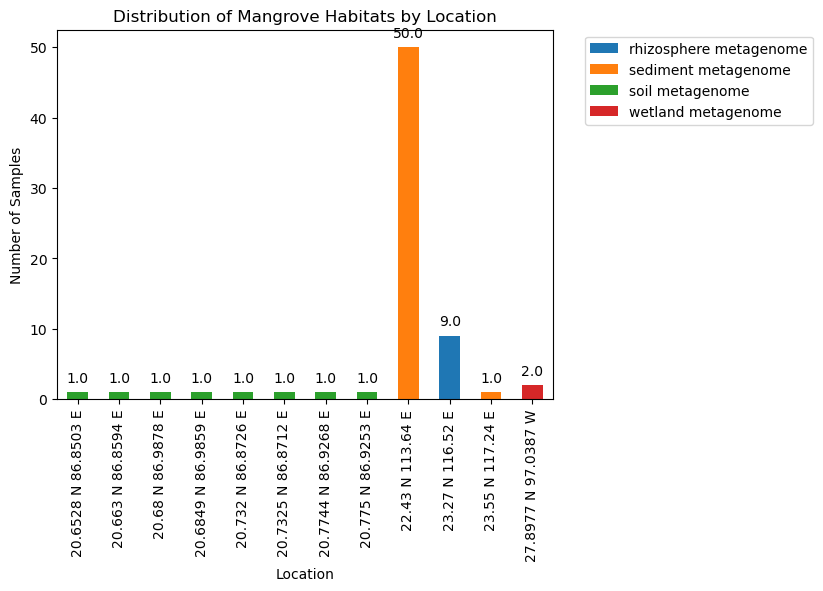

In [349]:
# @title Samples Count :

# Create a bar plot for visualization

_ = samples_count_df.plot(kind='bar', stacked=True)

  # Place the bar values in the bar plot
for p in _.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        _.annotate(f'{height}', (x + width/2, y + 2.0 + height), ha='center', va='center')

  # Place the labels in the bar plot
plt.xlabel('Location')
plt.ylabel('Number of Samples')
plt.title('Distribution of Mangrove Habitats by Location')

  # Place the legend outside the bar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  # Save the bar plot
#plt.savefig('Distribution_of_Mangrove_Habitats_by_Location.jpg', bbox_inches='tight')

  # Display the plot
plt.show()

In [350]:
# Add to df_scatter_geo as 'samples_count' column

samples_count_df = samples_count_df.stack().reset_index(name='samples_count') # Flatten the samples_count_df
df_scatter_geo = df_scatter_geo.merge(samples_count_df, on=['location', 'scientific_name_labels'])

df_scatter_geo

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,location,lat,lon,country,fastq_bytes,fastq_ftp,scientific_name_labels,collection_date_year,runs_count,samples_count
0,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...,rhizosphere metagenome,2018,9.0,9.0
1,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,23.27 N 116.52 E,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...,rhizosphere metagenome,2018,9.0,9.0
2,SRR17658262,SAMN25078545,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2306559317;2451278707,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/062/SRR176...,sediment metagenome,2019,50.0,50.0
3,SRR17658267,SAMN25078541,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2476667887;2652808811,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/067/SRR176...,sediment metagenome,2019,50.0,50.0
4,SRR17658269,SAMN25078539,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2412199078;2593155762,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/069/SRR176...,sediment metagenome,2019,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SRR17658297,SAMN25078513,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,4509019404;4570932808,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/097/SRR176...,sediment metagenome,2019,50.0,50.0
67,SRR17658300,SAMN25078502,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,22.43 N 113.64 E,22.43,113.64,China:Pearl River Estuary,2679965801;2839928294,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/000/SRR176...,sediment metagenome,2019,50.0,50.0
68,SRR12150540,SAMN14511813,PRJNA619558,Sediment microbial communities from coastal we...,Sediment microbial communities from coastal we...,WGS,wetland metagenome,ILLUMINA,Illumina NovaSeq 6000,2018-08-19,27.8977 N 97.0387 W,27.8977,-97.0387,USA: Texas,3202116262;3247437731,ftp.sra.ebi.ac.uk/vol1/fastq/SRR121/040/SRR121...,wetland metagenome,2018,2.0,2.0
69,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,20.7744 N 86.9268 E,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...,soil metagenome,2022,1.0,1.0


In [445]:
# Calculate the Studies count for each combination of 'location' and 'scientific_name_labels'

studies_count_df = df_scatter_geo.groupby(['location', 'scientific_name_labels'])['study_accession'].nunique().unstack().fillna(0)
studies_count_df

scientific_name_labels,rhizosphere metagenome,sediment metagenome,soil metagenome,wetland metagenome
location,,,,
20.6528 N 86.8503 E,0.0,0.0,1.0,0.0
20.663 N 86.8594 E,0.0,0.0,1.0,0.0
20.68 N 86.9878 E,0.0,0.0,1.0,0.0
20.6849 N 86.9859 E,0.0,0.0,1.0,0.0
20.732 N 86.8726 E,0.0,0.0,1.0,0.0
20.7325 N 86.8712 E,0.0,0.0,1.0,0.0
20.7744 N 86.9268 E,0.0,0.0,1.0,0.0
20.775 N 86.9253 E,0.0,0.0,1.0,0.0
22.43 N 113.64 E,0.0,1.0,0.0,0.0


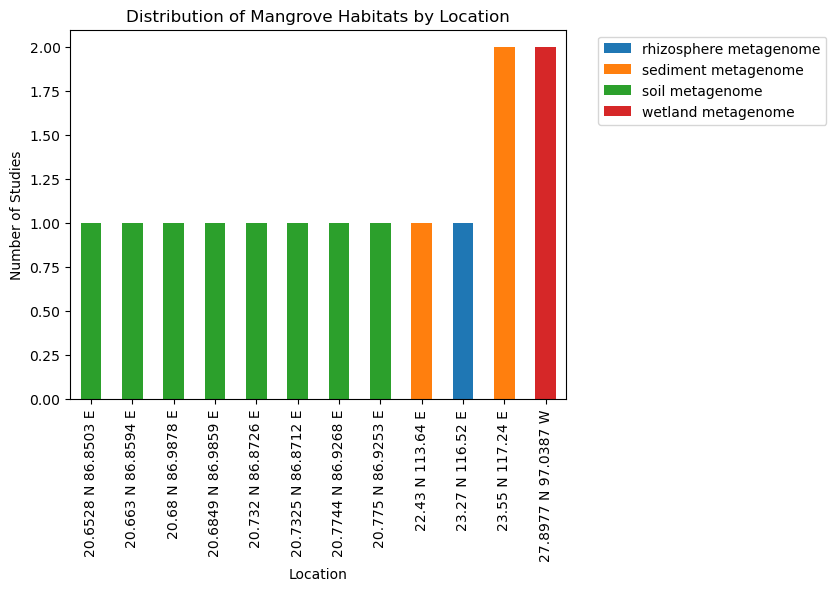

In [352]:
# @title Studies Count :

# Create a bar plot for visualization

_ = studies_count_df.plot(kind='bar', stacked=True)

  # Place the bar values in the bar plot
for p in _.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        _.annotate(f'{height}', (x + width/2, y + 2.0 + height), ha='center', va='center')

  # Place the labels in the bar plot
plt.xlabel('Location')
plt.ylabel('Number of Studies')
plt.title('Distribution of Mangrove Habitats by Location')

  # Place the legend outside the bar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

  # Save the bar plot
#plt.savefig('Distribution_of_Mangrove_Habitats_by_Location.jpg', bbox_inches='tight')

  # Display the plot
plt.show()

In [353]:
# Add to df_scatter_geo as 'studies_count' column

studies_count_df = studies_count_df.stack().reset_index(name='studies_count')# Flatten the samples_count_df
df_scatter_geo = df_scatter_geo.merge(studies_count_df, on=['location', 'scientific_name_labels'])

df_scatter_geo

,run_accession,sample_accession,study_accession,sample_description,study_title,library_strategy,scientific_name,instrument_platform,instrument_model,collection_date_end,...,lat,lon,country,fastq_bytes,fastq_ftp,scientific_name_labels,collection_date_year,runs_count,samples_count,studies_count
0,ERR4833476,SAMEA7567423,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,...,23.27,116.52,China,3585629891;3960554345,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/006/ERR483...,rhizosphere metagenome,2018,9.0,9.0,1.0
1,ERR4833477,SAMEA7567424,PRJEB41295,Mangrove rhizosphere metagenome,Native and introduced mangroves select distinc...,WGS,mangrove metagenome,ILLUMINA,NextSeq 550,2018-12-31,...,23.27,116.52,China,3675375581;4063769533,ftp.sra.ebi.ac.uk/vol1/fastq/ERR483/007/ERR483...,rhizosphere metagenome,2018,9.0,9.0,1.0
2,SRR17658262,SAMN25078545,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,...,22.43,113.64,China:Pearl River Estuary,2306559317;2451278707,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/062/SRR176...,sediment metagenome,2019,50.0,50.0,1.0
3,SRR17658267,SAMN25078541,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,...,22.43,113.64,China:Pearl River Estuary,2476667887;2652808811,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/067/SRR176...,sediment metagenome,2019,50.0,50.0,1.0
4,SRR17658269,SAMN25078539,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,...,22.43,113.64,China:Pearl River Estuary,2412199078;2593155762,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/069/SRR176...,sediment metagenome,2019,50.0,50.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SRR17658297,SAMN25078513,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,...,22.43,113.64,China:Pearl River Estuary,4509019404;4570932808,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/097/SRR176...,sediment metagenome,2019,50.0,50.0,1.0
67,SRR17658300,SAMN25078502,PRJNA798446,Mangrove sediments in the Qi’ao Mangrove Wetla...,Shotgun metagenome of microbial community in m...,WGS,sediment metagenome,ILLUMINA,Illumina NovaSeq 6000,2019-12-21,...,22.43,113.64,China:Pearl River Estuary,2679965801;2839928294,ftp.sra.ebi.ac.uk/vol1/fastq/SRR176/000/SRR176...,sediment metagenome,2019,50.0,50.0,1.0
68,SRR12150540,SAMN14511813,PRJNA619558,Sediment microbial communities from coastal we...,Sediment microbial communities from coastal we...,WGS,wetland metagenome,ILLUMINA,Illumina NovaSeq 6000,2018-08-19,...,27.8977,-97.0387,USA: Texas,3202116262;3247437731,ftp.sra.ebi.ac.uk/vol1/fastq/SRR121/040/SRR121...,wetland metagenome,2018,2.0,2.0,2.0
69,SRR24201523,SAMN33849203,PRJNA947344,Whole metagenome of rhizosphere soil of Kalibh...,Whole-metagenome shotgun sequencing of soil sa...,WGS,soil metagenome,ILLUMINA,Illumina NovaSeq 6000,2022-04-03,...,20.7744,86.9268,"India: Bhitarkanika mangrove forest, Odisha",2521256864;2490491525,ftp.sra.ebi.ac.uk/vol1/fastq/SRR242/023/SRR242...,soil metagenome,2022,1.0,1.0,1.0


In [354]:
# Save on a CSV field
df_scatter_geo.to_csv(metadata_path + '05_mangrove_metagenome_datasets_scattergeocounts_newcolums.csv', index=False)

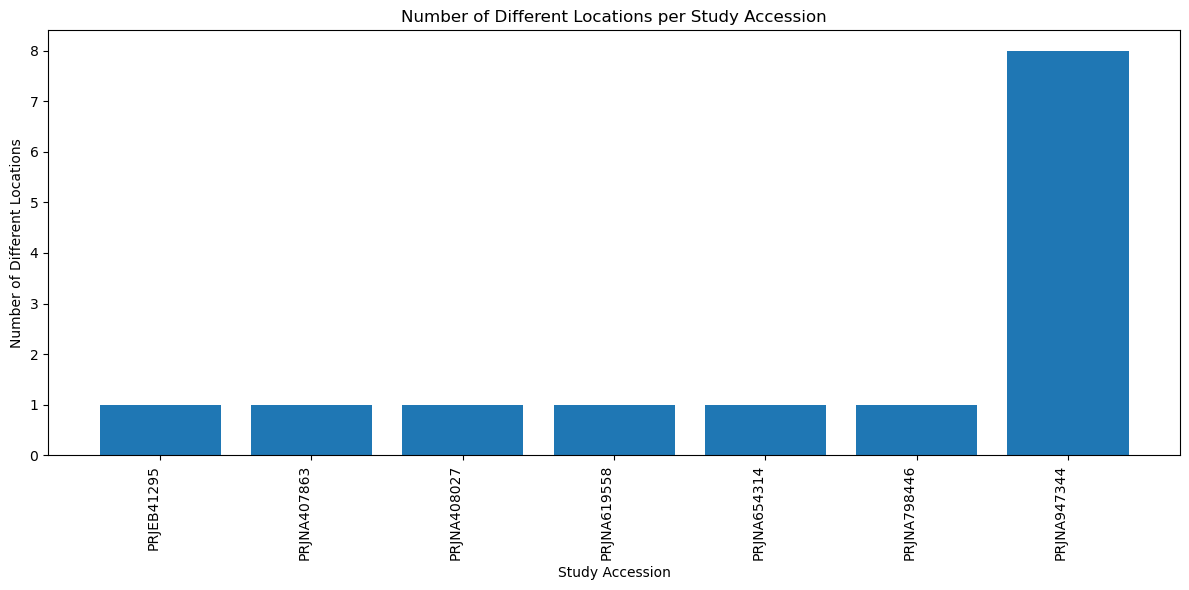

In [454]:
# Group data and count unique locations per study accession
location_counts = df_scatter_geo.groupby('study_accession')['location'].nunique().reset_index(name='location_count')

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(location_counts['study_accession'], location_counts['location_count'])
plt.xlabel('Study Accession')
plt.ylabel('Number of Different Locations')
plt.title('Number of Different Locations per Study Accession')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

### **Scatter Geo Plots**

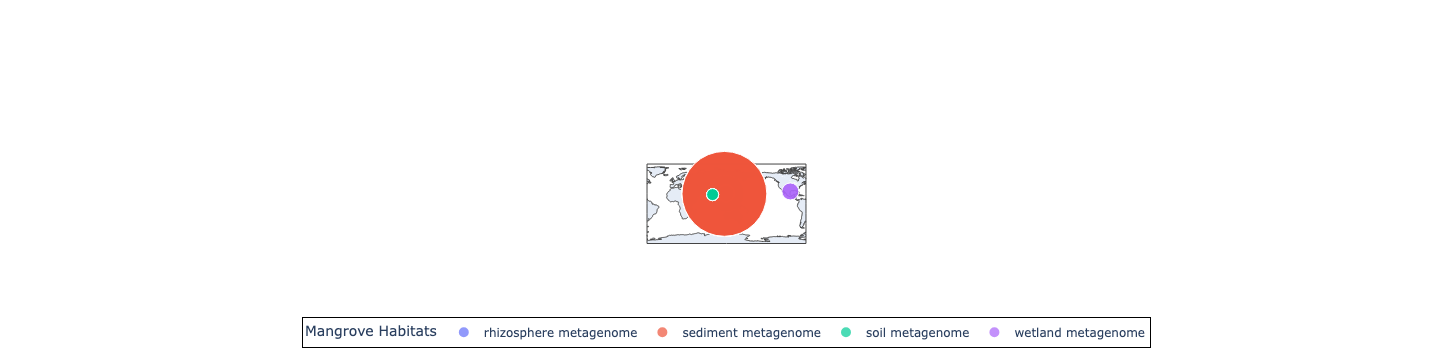

In [355]:
 # @title Scatter Geo Plot :

  # Create a scatter_geo plot
fig = px.scatter_geo(df_scatter_geo,
                     lat='lat',
                     lon='lon',
                     color='scientific_name_labels',
                     hover_name='location',
                     hover_data={'runs_count': True,
                                 'samples_count': True,
                                 'studies_count': True,
                                 'country': True,
                                 'lat': False, 'lon': False,  # Hide lat and lon from hover
                                 'scientific_name_labels': False},
                     size='runs_count',
                     size_max=60)

  # Customize hovertemplate
fig.update_traces(hovertemplate="<b>Location: %{hovertext}</b><br>"
                                "Runs Count: %{customdata[0]}<br>"
                                "Samples Count: %{customdata[1]}<br>"
                                "Studies Count: %{customdata[2]}<br>"
                                "Country: %{customdata[3]}<extra></extra>")
  # Customize legend
fig.update_layout( legend=dict(
        title="Mangrove Habitats",  # Change the title of the legend
        bgcolor='rgba(255, 255, 255, 0.5)',  # Change background color and transparency
        bordercolor='black',  # Change border color
        borderwidth=1,        # Change border width
        font=dict(size=12),
        orientation="h",      # Set the orientation of the legend to horizontal
        yanchor="top",        # Anchor the legend to the top
        y=-0.2,               # Position the legend below the plot
        xanchor="center",     # Anchor the legend to the center horizontally
        x=0.5                 # Position the legend in the middle of the plot
    ))

  # Display the scatter_geo plot
fig.show()

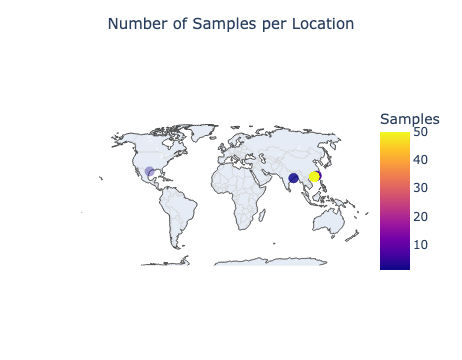

'scatter_geo_map_adjusted.html'

In [443]:
# Create a scatter_geo plot
fig = px.scatter_geo(df_scatter_geo,
                     lat='lat',
                     lon='lon',
                     color='samples_count',
                     hover_name='location',
                     hover_data={'scientific_name_labels': True,
                                 'runs_count': True,
                                 'samples_count': True,
                                 'studies_count': True,
                                 'country': True,
                                 'lat': False, 'lon': False,  # Hide lat and lon from hover
                                 },
                     title='Number of Samples per Location'
                    )

  # Customize hovertemplate
fig.update_traces(hovertemplate="<b>Location: %{hovertext}</b><br>"
                                "Mangrove Habitat: %{customdata[0]}<br>"
                                "Runs Count: %{customdata[1]}<br>"
                                "Samples Count: %{customdata[2]}<br>"
                                "Studies Count: %{customdata[3]}<br>"
                                "Country: %{customdata[4]}<extra></extra>")


fig.update_traces(marker=dict(size=10)) # update_traces to adjust marker size

 # Customize layout for aesthetics
fig.update_layout(
    geo=dict(
        showframe=False,  # Remove the frame around the map
        projection_type='natural earth',  # Use a natural earth projection
        # Country borders:
        showcountries=True,
        countrycolor="lightgray",
        countrywidth=0.5
    ),
    coloraxis_colorbar=dict(
        title='Samples',  # Title for the colorbar
        x=1,  # Position the colorbar to the right
        y=0.5  # Position the colorbar vertically centered
    ),
    title=dict(
        x=0.5,  # Center the title horizontally
        y=0.95,  # Position the title near the top
        font=dict(size=15)  # Increase title font size
    )
)

  # Show plot
fig.show()

In [444]:
# Save the plot as an HTML file using plotly.offline
pyo.plot(fig, filename= metadata_path + 'scatter_geo_map_adjusted.html', auto_open=False) # Save as HTML

'/home/jupyter-andres/MAGENTA/metadata/scatter_geo_map_adjusted.html'

## **Downloading Selected Datasets**
Download the *mangrove metagenome* selected datasets.

### **Creating download scripts for the selected records of each mangrove habitat**

In [384]:
df_download_fastqs = df_6.copy()

In [385]:
# Get unique 'scientific_name_labels'
unique_labels = df_download_fastqs['scientific_name_labels'].unique()

# Create a dictionary to store URLs based on labels
label_urls = {}
for label in unique_labels:
  label_urls[label] = []
  for index, row in df_download_fastqs.iterrows():
    if row['scientific_name_labels'] == label:
      urls = row['fastq_ftp'].split(';')
      label_urls[label].extend(urls)

# Create bash scripts for each label to download URLs
for label in label_urls:
  first_word = label.split()[0]
  with open(f'{scripts_path}download_{first_word}_script.sh', 'w') as f:
    f.write('#!/bin/bash\n\n')
    for url in label_urls[label]:
      f.write('wget ' + str(url) + '\n')

### **Downloading the selected records of each mangrove habitat**

In [390]:
with open(scripts_path + 'download_rawdata_script.sh', 'w') as f:
    f.write('''#!/bin/bash\n
rawdata_path="/files/magenta/rawdata"
scripts_path="/home/jupyter-andres/MAGENTA/scripts"\n
mkdir -p $rawdata_path/{rhizosphere,sediment,wetland,soil}
mkdir $scripts_path/run_info\n
# Grant execute permissions to the download scripts
chmod a+x $scripts_path/download_sediment_script.sh $scripts_path/download_wetland_script.sh $scripts_path/download_rhizosphere_script.sh $scripts_path/download_soil_script.sh\n
# Run the download scripts in the background and redirect output to "habitat"_nohup runinfo file
cd $rawdata_path/rhizosphere && nohup sh $scripts_path/download_rhizosphere_script.sh > $scripts_path/run_info/rhizosphere_nohup 2>&1 &\n
cd $rawdata_path/wetland && nohup sh $scripts_path/download_wetland_script.sh > $scripts_path/run_info/wetland_nohup 2>&1 &\n
cd $rawdata_path/sediment && nohup sh $scripts_path/download_sediment_script.sh > $scripts_path/run_info/sediment_nohup 2>&1 &\n
cd $rawdata_path/soil && nohup sh $scripts_path/download_soil_script.sh > $scripts_path/run_info/soil_nohup 2>&1 &\n
''')

In [387]:
# Change the script's execution permissions
! chmod a+x /home/jupyter-andres/MAGENTA/scripts/download_rawdata_script.sh

### **Run download_rawdata_script.sh in the terminal**

! bash /home/jupyter-andres/MAGENTA/scripts/download_rawdata_script.sh

In [426]:
# Check that all files were downloaded successfully

# Number of wget commands executed
! grep "wget" /home/jupyter-andres/MAGENTA/scripts/*.sh | wc -l 

141


 - vs -

In [428]:
# Number of 'saved' messages into the nohup files
! grep "saved" /home/jupyter-andres/MAGENTA/scripts/run_info/* | wc -l

141
